In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("../data/train.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [8]:
data=data.rename(columns={
    'gender':'sex',
    'income_>50K':'income',
    'educational-num':'education-num'
})
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


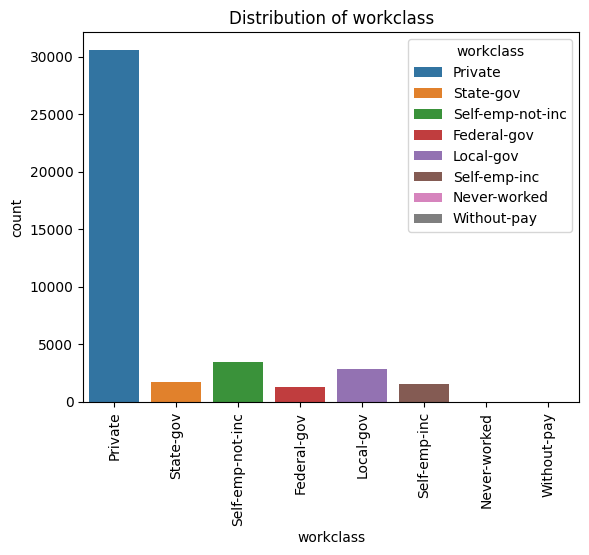

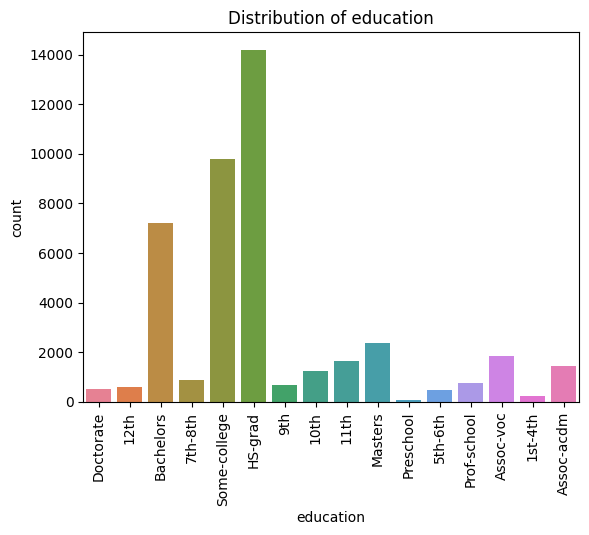

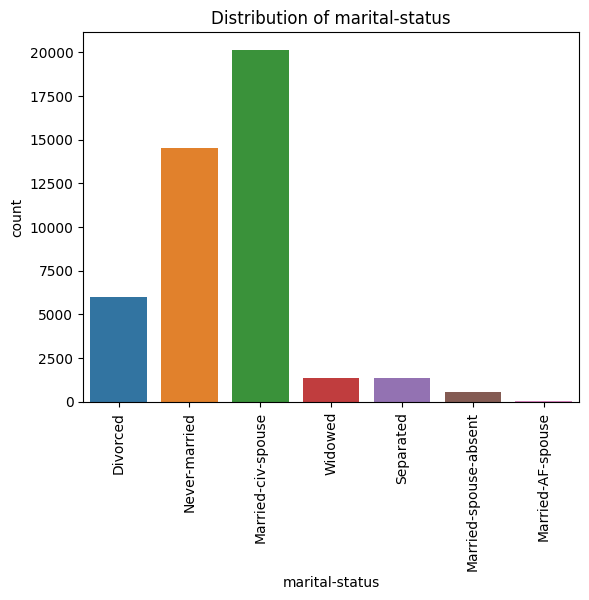

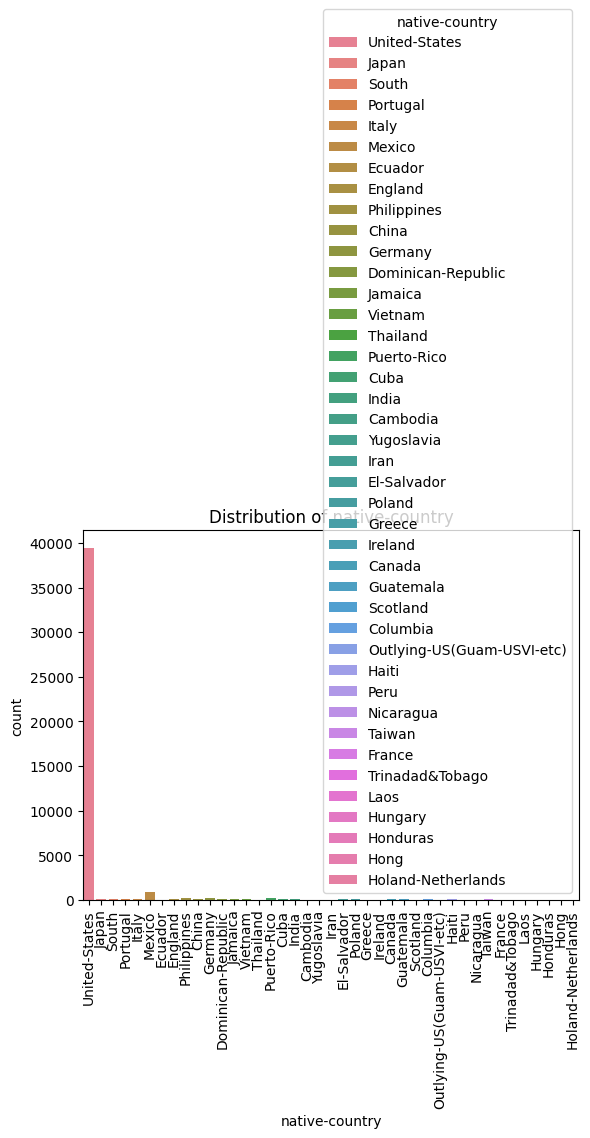

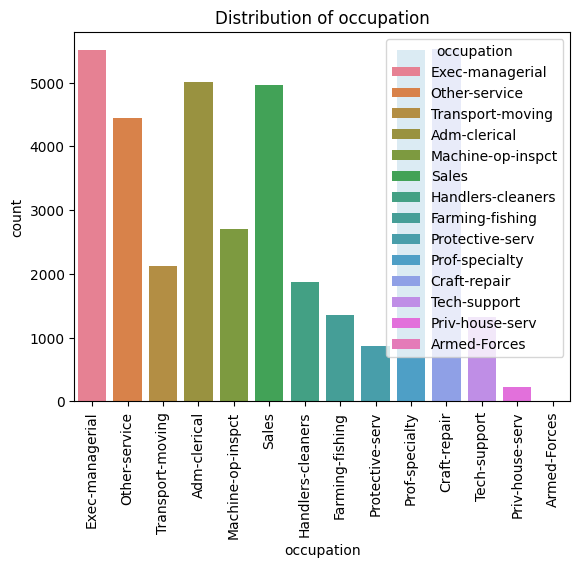

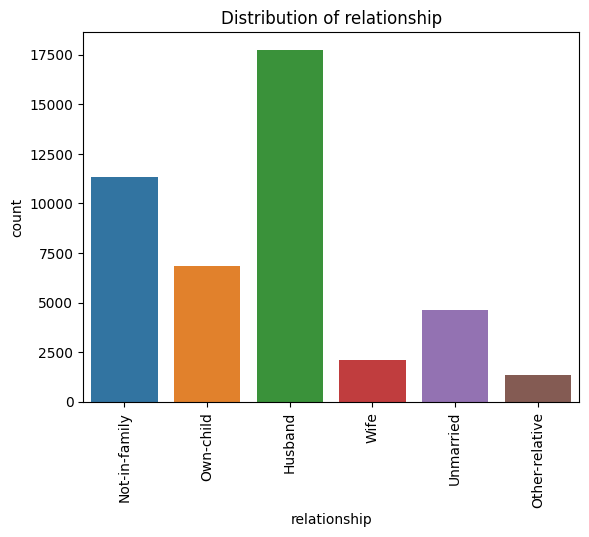

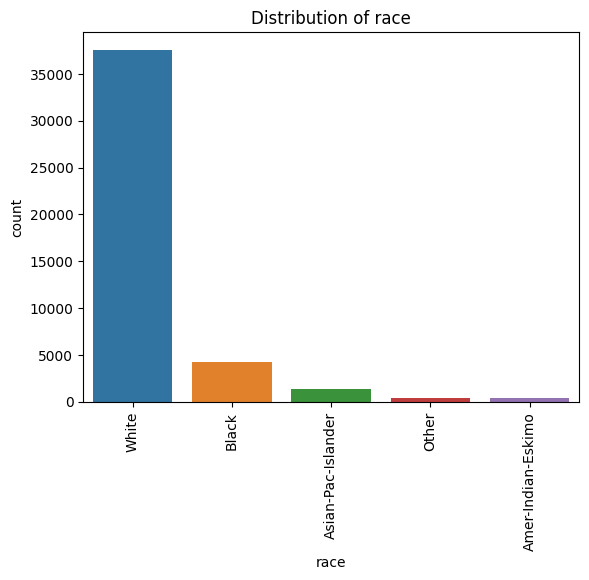

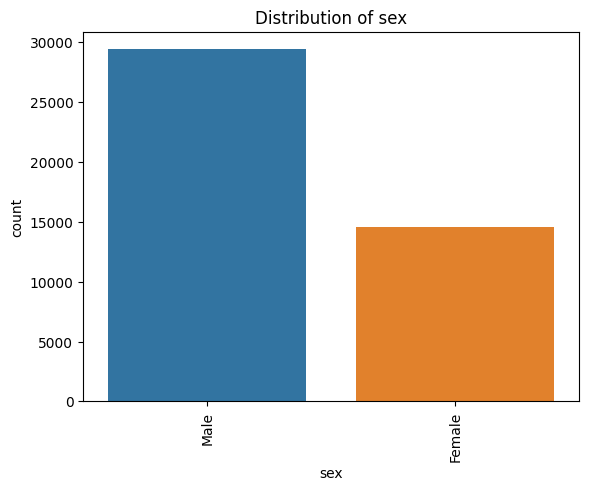

In [9]:
demog=["workclass","education","marital-status","native-country","occupation","relationship","race","sex"]

for col in demog: 
    sns.countplot(data=data, x=col, hue=col)  
    plt.xticks(rotation=90) 
    plt.title(f'Distribution of {col}')  
    plt.show()

In [10]:
data=data.replace('?',np.nan)

data.isna().sum()

age                  0
workclass         2498
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2506
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     763
income               0
dtype: int64

In [11]:
data.dropna(inplace=True,axis=0)

data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<Axes: >

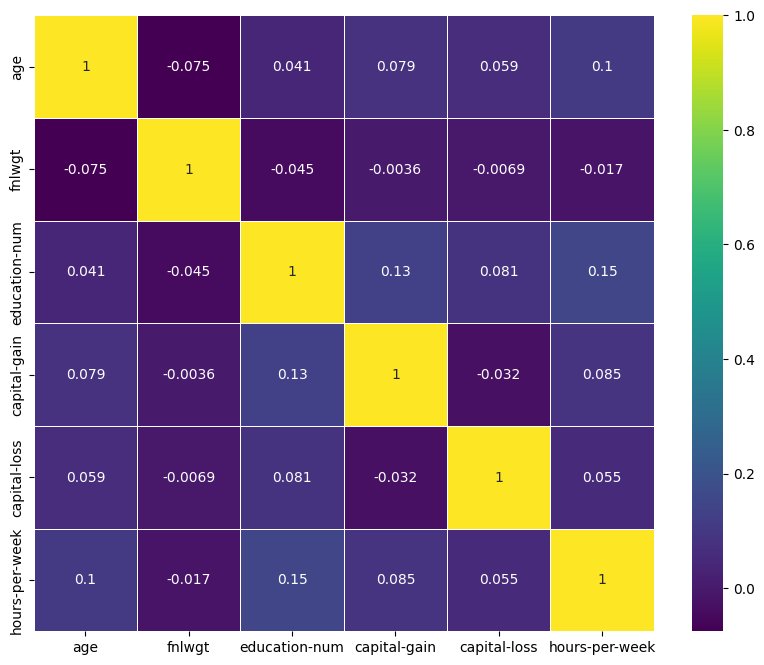

In [12]:
num_data=data[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]

plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(num_data.corr(),cmap="viridis",annot=True,linewidth=0.5)

In [13]:
cat_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
data[cat_columns].nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

In [14]:
df_dumy = pd.get_dummies(data, columns = cat_columns)
df_dumy

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,17,244602,8,0,0,15,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,31,174201,13,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,58,110199,4,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,25,149248,10,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
43953,19,116562,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
43954,30,197947,10,0,0,58,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
43955,46,97883,13,0,0,35,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [15]:
le=LabelEncoder()
for col in df_dumy.columns:
    if df_dumy[col].dtypes==bool:
        df_dumy[col]=le.fit_transform(df_dumy[col])
        
df_dumy

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43953,19,116562,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43954,30,197947,10,0,0,58,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43955,46,97883,13,0,0,35,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [16]:
X = df_dumy.drop(["income","education-num"],axis=1)
y = df_dumy["income"]

In [17]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

In [19]:
feature_names=X.columns
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier()),
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]


for name, model in model_list:
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

LR: 0.8197410004896462 (0.0066775922572331215)
KNN: 0.8249639177749476 (0.00732086914400949)
DTC: 0.9146943394067225 (0.005035864275052883)
RFC: 0.9252487083895243 (0.003675599941579429)


In [21]:
tuned_model_rf = RandomForestClassifier(n_estimators=50,max_features=5)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

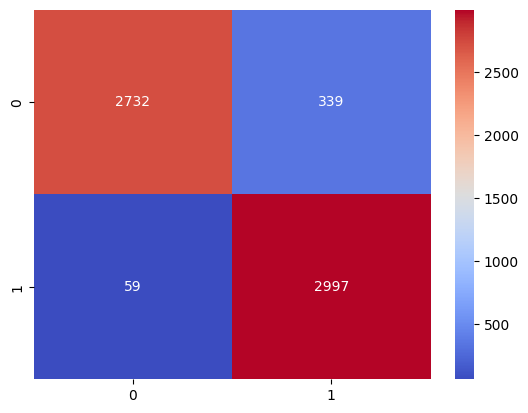

In [22]:
accuracy_score(y_test,predictions)
conf_matrix=confusion_matrix(y_test,predictions)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

In [23]:
import pickle

with open('../saved_models/CImodel.pkl', 'wb') as model_file:
    pickle.dump(tuned_model_rf, model_file)

with open('../saved_models/CIscaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
    
with open('../saved_models/feature_names.pkl', 'wb') as feature_file:
    pickle.dump(feature_names, feature_file)